In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [70]:
result_files = glob('../results/best_tg/results*.csv')
results = pd.concat([pd.read_csv(file) for file in result_files])

metric_files = glob('../results/best_tg/metrics*.csv')
metrics = pd.concat([pd.read_csv(file) for file in metric_files])

loss_files = glob('../results/best_tg/loss*.csv')
loss = pd.read_csv(loss_files[0])

In [ ]:
results.min(), results.max()

(SMILES       */C(=C(/*)c1ccc(C(C)(C)C)cc1)c1ccccc1
 true                                        -139.0
 predicted                               -130.02124
 dtype: object,
 SMILES       c1ccc(OCC2CO2)cc1
 true                     649.0
 predicted           658.226868
 dtype: object)

In [116]:
metrics.mean()

MAE       24.408001
MSE     1452.555989
RMSE      38.084587
R2         0.896794
dtype: float64

Text(0, 0.5, 'Scaled MSE')

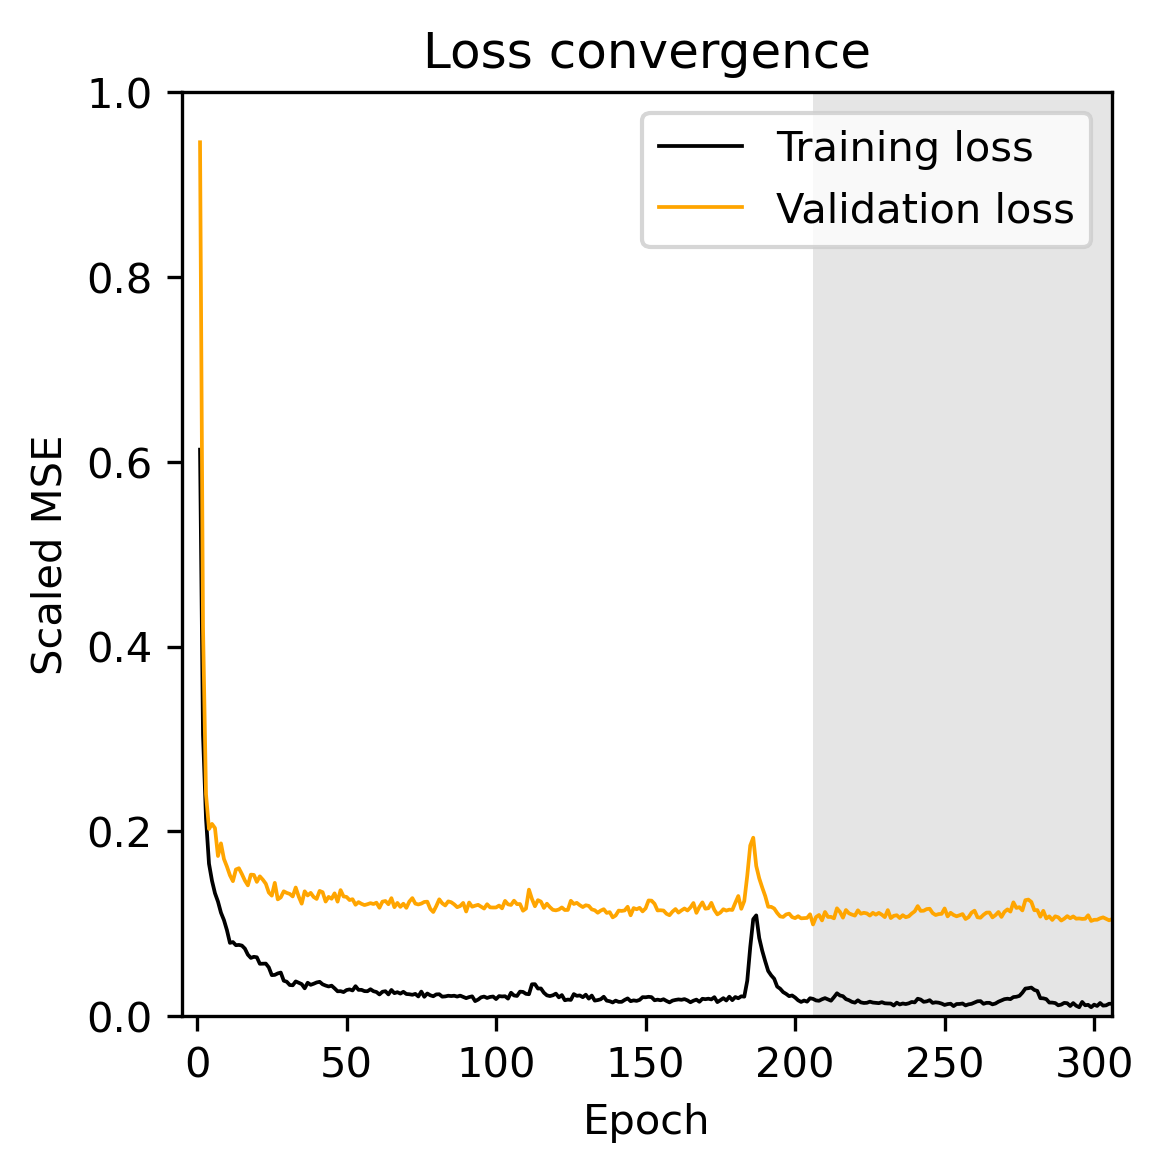

In [114]:
loss = pd.read_csv(loss_files[0])

plt.figure(dpi=300, figsize=(4,4))
ax = plt.subplot(1,1,1)

ax.plot(loss.index+1, loss['Training Loss'], color='black', linewidth=0.9, label='Training loss')
ax.plot(loss.index+1, loss['Validation Loss'], color='orange', linewidth=0.9, label='Validation loss')
ax.axvspan(list(loss.index+1)[-1]-100, list(loss.index+1)[-1], alpha=0.2, color='grey', linewidth=0)

ax.legend(loc='upper right')
ax.set_xlim((-5,306))
ax.set_ylim((-0,1))
ax.set_title('Loss convergence')
ax.set_xlabel('Epoch')
ax.set_ylabel('Scaled MSE')

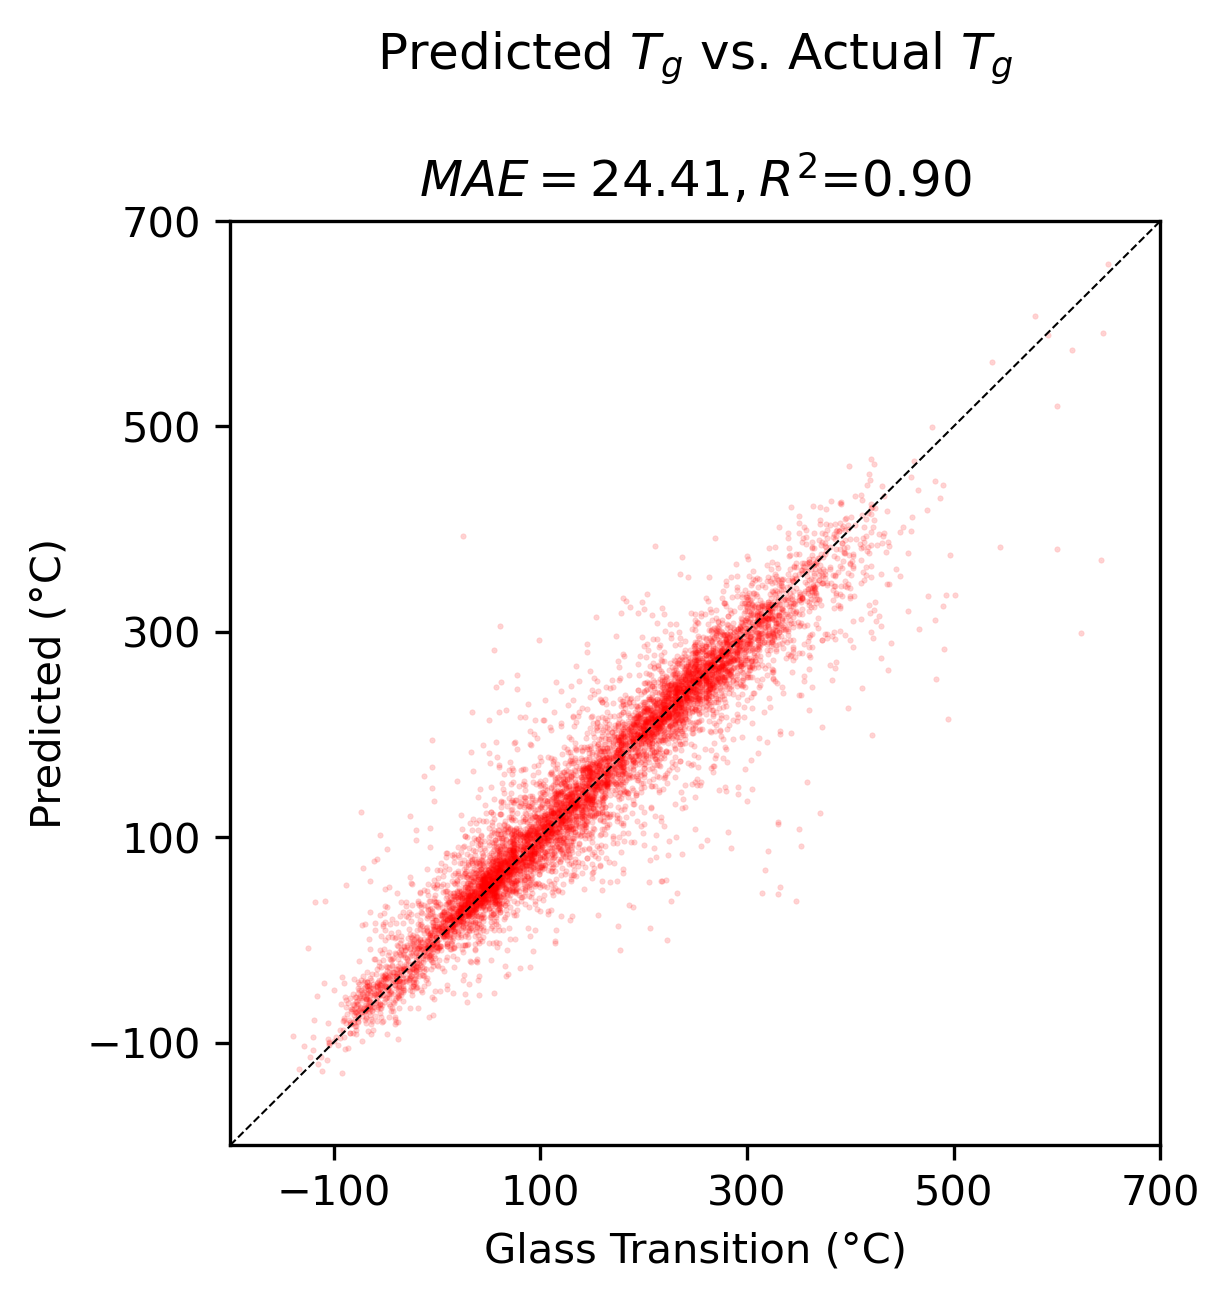

In [68]:
plt.figure(dpi=300, figsize=(4,4))
ax = plt.subplot(1,1,1)

ax.scatter(results['true'], results['predicted'], s=0.2, edgecolor=None, facecolor='red', alpha=0.2)
ax.plot([0,1],[0,1], transform=ax.transAxes, zorder=1, color='black', linewidth=0.5, linestyle='dashed')

ax.set_title('Predicted $T_g$ vs. Actual $T_g$\n\n$MAE=%0.2f, R^2$=%0.2f' % (metrics.mean()['MAE'], metrics.mean()['R2']))
ax.set_ylabel('Predicted (°C)')
ax.set_xlabel('Glass Transition (°C)')
ax.set_xlim((-200,700))
ax.set_ylim((-200,700))
ax.set_xticks([-100,100,300,500,700])
ax.set_yticks([-100,100,300,500,700])